# **Ford-Sentence Classification using Naive Bayes Classifier (NBC)**

Mount the GDrive in this Google colab - 

In [5]:
# Code for mounting your Gdrive

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# Use text data for text classification:
Now, the Kaggle dataset - https://www.kaggle.com/datasets/gaveshjain/ford-sentence-classifiaction-dataset?resource=download, is uploaded in my GDrive and renamed the archive folder as NBC. Let's look at the contents of each file that the dataset contains.

In [6]:
import pandas as pd
# base folder name
folder_name = "/content/drive/MyDrive/NBC/"
sample_submission_csv = folder_name + "sample_submission.csv"

sample = pd.read_csv(sample_submission_csv)
# contents of sample_submission.csv
sample

,Sentence_id,Type
0,GERRES15609,Responsibility
1,PHERES15784,Responsibility
2,GERREQ10457,Requirement
3,GERSKL27235,Skill
4,HONSSK18415,SoftSkill


In [7]:
test_csv = folder_name + "test_data.csv"
test = pd.read_csv(test_csv)
# contents of test_data
test

,Unnamed: 0,Sentence_id,New_Sentence
0,0,UAERES16346,Collaborate across all of DB&T practices and o...
1,1,COGREQ15586,Strong technology expertise in Identity and A...
2,2,UAEREQ12722,Strong knowledge on Service Virtualization.
3,3,COGSKL29155,Architect scalable data processing and analyti...
4,4,PHERES12551,"Map client organization, build outstanding rel..."
...,...,...,...
15024,15024,HONEXP17084,A minimum of 3 years of experience in Industri...
15025,15025,UAESSK45553,Track record of managing multiple projects wit...
15026,15026,GERSSK14317,"In addition, the candidate should have effecti..."
15027,15027,PHEREQ4980,Candidate should have sufficient knowledge on ...


In [8]:
train_csv = folder_name + "train_data.csv"
train = pd.read_csv(train_csv)
# contents of test_data
train

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
60110,60110,UAERES18030,"In this position, you will utilize your progr...",Responsibility
60111,60111,GERRES3026,"In addition, this individual will be responsib...",Responsibility
60112,60112,INDSSK5492,Good problem solving skills.,SoftSkill
60113,60113,PHESSK15092,Good Excel knowledge .,SoftSkill


# Unique Categories/Classes:
Since we have to classify ford sentence into categories/types, let's find unique types or classes.

In [9]:
# unique categories/classes
unique_sentence_categories_type = train['Type'].unique()
print("Total number of Categories : " + str(len(unique_sentence_categories_type)))
print("Categories are : ")
count = 1
for type in unique_sentence_categories_type:
  print(str(count) + ". " + type)
  count += 1

Total number of Categories : 6
Categories are : 
1. Responsibility
2. Requirement
3. Skill
4. SoftSkill
5. Education
6. Experience


# **Process to build NBC:**
**Step 1:** Merge the dataset into one - test_data.csv & train_data.csv
In our case dataframes 'test' and 'train'. Used - https://pandas.pydata.org/pandas-docs/version/0.20/merging.html

In [10]:
# merge the two dataframes
dataframes = [train, test]
ford_dataset = pd.concat(dataframes)
# 15029 rows in test file + 60115 rows in train file = 75144
ford_dataset

,Unnamed: 0,Sentence_id,New_Sentence,Type
0,0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility
1,1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility
2,2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement
3,3,GERSKL27235,"Previous business experience, including but no...",Skill
4,4,HONSSK18415,Delivering fast and right the first time.,SoftSkill
...,...,...,...,...
15024,15024,HONEXP17084,A minimum of 3 years of experience in Industri...,NaN
15025,15025,UAESSK45553,Track record of managing multiple projects wit...,NaN
15026,15026,GERSSK14317,"In addition, the candidate should have effecti...",NaN
15027,15027,PHEREQ4980,Candidate should have sufficient knowledge on ...,NaN


In [11]:
# unique categories/classes after merging data
unique_sentence_categories_type_after_merging = ford_dataset['Type'].unique()
print("Total number of Categories after merging the data: " + str(len(unique_sentence_categories_type_after_merging)))
print("Unique Categories after merging data are : ")
# NaN for uncategorized type/class
print(unique_sentence_categories_type_after_merging)

Total number of Categories after merging the data: 7
Unique Categories after merging data are : 
['Responsibility' 'Requirement' 'Skill' 'SoftSkill' 'Education'
 'Experience' nan]


Here NaN type is for uncategorized sentence that we will do using Naive bayes method.
# Visualizing Category Types and their counts:

In [12]:
import matplotlib.pyplot as plt
labels = list(ford_dataset['Type'].unique())
labels

['Responsibility',
 'Requirement',
 'Skill',
 'SoftSkill',
 'Education',
 'Experience',
 nan]

# Data Pre-processing:
We will clean up the data. Firstly, we will remove punctuation or any special symbols present in the sentence text.

In [13]:
# Remove punctuation/any special symbols, 
# first convert into lower case letters and then replace the special symbols with a white space.
# drop Unnamed: 0, sentence_id column as its not needed.

ford_dataset['New_Sentence'] = ford_dataset['New_Sentence'].str.lower()
ford_dataset['New_Sentence'] = ford_dataset['New_Sentence'].str.replace('[^\w\s]',' ')
ford_dataset = ford_dataset.drop('Sentence_id', axis=1)
ford_dataset = ford_dataset.drop('Unnamed: 0', axis=1)
ford_dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,New_Sentence,Type
0,author and or review architecture design and o...,Responsibility
1,should be able to develop custom dynamic shape...,Responsibility
2,experience in working crosslly with a larger ...,Requirement
3,previous business experience including but no...,Skill
4,delivering fast and right the first time,SoftSkill
...,...,...
15024,a minimum of 3 years of experience in industri...,NaN
15025,track record of managing multiple projects wit...,NaN
15026,in addition the candidate should have effecti...,NaN
15027,candidate should have sufficient knowledge on ...,NaN


**Step 2:** Split the dataset into training, test and dev data.

In [14]:
# Let's say we want to split the data in 80:10:10 for train:dev:test dataset
train_size = 0.8
dev_size = 0.1
test_size = 0.1

train_index = int(len(ford_dataset)*train_size)

# First we need to sort the dataset by the desired column 
ford_dataset.sort_values(by = 'Type', ascending=True, inplace=True)

ford_dataset_train = ford_dataset[0:train_index]
ford_dataset_rem = ford_dataset[train_index:]
ford_dataset_rem

dev_index = int(len(ford_dataset)*dev_size)
ford_dataset_dev = ford_dataset[train_index:train_index+dev_index]
ford_dataset_test = ford_dataset[train_index+dev_index:]

In [15]:
print("********** TRAINING DATASET *************")
print(ford_dataset_train.info())
print(ford_dataset_train.shape)
print("\n********** TESTING DATASET *************")
print(ford_dataset_test.info())
print(ford_dataset_test.shape)
print("\n********** DEVELOPMENT DATASET *************")
print(ford_dataset_dev.info())
print(ford_dataset_dev.shape)

********** TRAINING DATASET *************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 60115 entries, 60114 to 34616
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   New_Sentence  59002 non-null  object
 1   Type          60115 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None
(60115, 2)

********** TESTING DATASET *************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7515 entries, 7514 to 15028
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   New_Sentence  7377 non-null   object
 1   Type          0 non-null      object
dtypes: object(2)
memory usage: 176.1+ KB
None
(7515, 2)

********** DEVELOPMENT DATASET *************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7514 entries, 0 to 7513
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   New_

**Step 3:** Build Vocabulary list and dictionary of words and their ocurrence.

Before that let's analyse the training dataset by calculating prior probability of each sentence type.

In [16]:
# Segregate the features & target data
# Feature = New_Sentence
# Target = Type
ford_dataset_train_X = ford_dataset_train['New_Sentence']
ford_dataset_dev_X = ford_dataset_dev['New_Sentence']
ford_dataset_test_X = ford_dataset_test['New_Sentence']

ford_dataset_train_y = ford_dataset_train['Type']
ford_dataset_dev_y = ford_dataset_dev['Type']
ford_dataset_test_y = ford_dataset_test['Type']

unique_training_types = list(ford_dataset_train_y.unique())
#print(unique_training_types)
dict_types = {}
for class_type in unique_training_types:
  dict_types[class_type] = sum(ford_dataset_train_y == class_type)

for key_type, count in dict_types.items():
  print(key_type + ": " + str(count))

Education: 4637
Experience: 9248
Requirement: 14132
Responsibility: 15561
Skill: 6956
SoftSkill: 9581


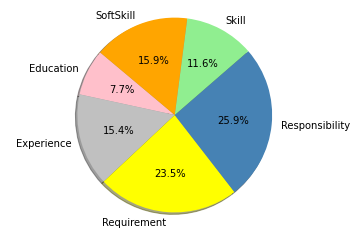

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
  
labels = dict_types.keys()
count = dict_types.values()
# Plot
plt.pie(count, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140, colors=['pink', 'silver', 'yellow', 'steelblue', 'lightgreen', 'orange'])
plt.axis('equal')
plt.show()


In [17]:
# Calculate Prior Probability of each class type
def calculate_prior_probability(): 
  sentence_type_prior_probability = dict()
  total_sentence_type_count = ford_dataset_train_y.size
  for key_type, value_count in dict_types.items():
    sentence_type_prior_probability[key_type] = value_count / total_sentence_type_count;
  return sentence_type_prior_probability

for key_type, probability in calculate_prior_probability().items():
  print(key_type + ": " + str(probability))


Education: 0.07713549031023871
Experience: 0.1538384762538468
Requirement: 0.23508275804707643
Responsibility: 0.25885386342842887
Skill: 0.11571155285702403
SoftSkill: 0.15937785910338517


In [18]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words_sentence = set(stopwords.words('english'))
# print(stop_words_sentence)
# Remove Stop words


def build_vacabulary(sentences, remove_stop_words = False):
  # print(sentences)
  vocabulary_list = []
  dictionary_word_count = {}
  for sentence in sentences:
    words_in_sentence = str(sentence).split(' ')
    for each_word in words_in_sentence:
      # remove white spaces
      each_word = re.sub(r'\d', ' ', each_word)
      each_word = str(each_word).strip()
      if each_word == "":
          continue
      if remove_stop_words:
        if each_word in stop_words_sentence:
          continue  
      if each_word in dictionary_word_count.keys():
        dictionary_word_count[each_word] += 1
      else:
        dictionary_word_count[each_word] = 1
        vocabulary_list.append(each_word)
  # Now omitting rare words, whose count is < 5 - 
  dictionary_word_count = {key: val for key,
            val in dictionary_word_count.items() if val > 5}
  return dictionary_word_count, vocabulary_list

dictionary_word_count, vocabulary_list = build_vacabulary(ford_dataset_train_X)
print(vocabulary_list)
print(dictionary_word_count)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['bachelors', 'degree', 'in', 'electrical', 'engineering', 'mechanical', 'or', 'applied', 'science', 'business', 'an', 'mba', 'highly', 'desirable', 'college', 'relevant', 'work', 'experience', 'het', 'bezit', 'is', 'van', 'een', 'vca', 'diploma', 'you', 'must', 'havebachelors', 'other', 'related', 'the', 'field', 'bachelor', 'master', 'design', 'human', 'factors', 'psychology', 'sociology', 'with', 'overseas', 'as', 'a', 'plus', 'serves', 'senior', 'onsite', 'delivery', 'liaison', 'supporting', 'client', 'and', 'internal', 'teams', 'works', 'closely', 'ep', 'to', 'ensure', 'alignment', 'of', 'clients', 'key', 'objectives', 'improved', 'governance', 'have', 'university', 'appropriate', 'technical', 'professional', 'administrative', 'partners', 'certification', 'communication', 'certified', 'one', 'some', 'mcsa', 'mcse', 'infra', 'redhat', 'information', 'systems', 'computer', 'minimum', 'semester', 'hours', 'courses', 'two', 'additional', 'years', 'direct', 'lieu', 'aerospace', 'admini

In [19]:
dictionary_word_count, vocabulary_list = build_vacabulary(ford_dataset_train_X)
print(dictionary_word_count)
print(len(vocabulary_list))

{'bachelors': 1815, 'degree': 3745, 'in': 19368, 'electrical': 820, 'engineering': 4344, 'mechanical': 768, 'or': 9342, 'applied': 96, 'science': 1356, 'business': 4833, 'an': 2002, 'mba': 258, 'highly': 560, 'desirable': 204, 'college': 146, 'relevant': 728, 'work': 3687, 'experience': 16175, 'het': 35, 'bezit': 10, 'is': 3886, 'van': 64, 'een': 44, 'vca': 6, 'diploma': 239, 'you': 2196, 'must': 2169, 'havebachelors': 278, 'other': 1239, 'related': 1742, 'the': 13434, 'field': 1214, 'bachelor': 340, 'master': 226, 'design': 2587, 'human': 185, 'factors': 47, 'psychology': 17, 'with': 12107, 'as': 3811, 'a': 9875, 'plus': 640, 'serves': 19, 'senior': 501, 'onsite': 74, 'delivery': 804, 'liaison': 66, 'supporting': 320, 'client': 792, 'and': 41591, 'internal': 719, 'teams': 1507, 'works': 146, 'closely': 298, 'to': 19509, 'ensure': 1039, 'alignment': 119, 'of': 20411, 'clients': 378, 'key': 976, 'objectives': 344, 'improved': 24, 'governance': 142, 'have': 2229, 'university': 197, 'appr

**Step 4:** Finding the probability of each word -

In [20]:
def calculate_probability_each_word(data, remove_stop_words = False):
  dictionary_word_count, vocabulary_list = build_vacabulary(data, remove_stop_words)
  total_count_words = sum(dictionary_word_count.values())
  probability_each_word = {}
  for each_word, count in dictionary_word_count.items():
    probability_each_word[each_word] = count / total_count_words
  return probability_each_word

probability_each_word = calculate_probability_each_word(ford_dataset_train_X, True)
print(probability_each_word)

{'bachelors': 0.003669342692347348, 'degree': 0.007571178172364088, 'electrical': 0.0016577746599034853, 'engineering': 0.008782162344659438, 'mechanical': 0.00155264748634863, 'applied': 0.00019408093579357876, 'science': 0.0027413932180842997, 'business': 0.00977076211135798, 'mba': 0.0005215925149452429, 'highly': 0.0011321387921292094, 'desirable': 0.00041242198856135485, 'college': 0.000295164756519401, 'relevant': 0.0014717804297679723, 'work': 0.007453920940322134, 'experience': 0.03270061600480351, 'het': 7.075867450807559e-05, 'bezit': 2.0216764145164453e-05, 'van': 0.0001293872905290525, 'een': 8.89537622387236e-05, 'vca': 1.2130058487098673e-05, 'diploma': 0.0004831806630694304, 'must': 0.00438501614308617, 'havebachelors': 0.0005620260432355718, 'related': 0.003521760314087648, 'field': 0.0024543151672229645, 'bachelor': 0.0006873699809355914, 'master': 0.0004568988696807166, 'design': 0.005230076884354044, 'human': 0.00037401013668554237, 'factors': 9.501879148227293e-05, 

**Step 5:** Finding the conditional probability before removing stop words -  

In [21]:
sentence_types = ford_dataset_train_y.unique()
# print(sentence_types)

In [22]:
def calculate_conditional_probability(class_type, data, stop_words_remove = False):
  conditional_probability = dict()
  sentences = data.loc[data.Type == class_type].New_Sentence
  sentences_length = len(sentences)
  # print(sentences_length)
  dictionary_word_count = {}
  vocabulary_list = []
  dictionary_word_count, vocabulary_list = build_vacabulary(sentences, stop_words_remove)


  for each_word, count in dictionary_word_count.items():
    conditional_probability[each_word] = count / sum(dictionary_word_count.values())
  return conditional_probability

In [23]:
import operator
for each_sentence_type in sentence_types:  
  conditional_probability = calculate_conditional_probability(each_sentence_type, ford_dataset_train, False)
  print("Sentence Type : " + each_sentence_type.upper())
  sorted_probability = dict(sorted(conditional_probability.items(), key = lambda x: x[1], reverse = True))
  print(sorted_probability)
  # Let's find top 10 words that predicts each class before removing stop words
  sorted_probability = dict(sorted(conditional_probability.items(), key=operator.itemgetter(1), reverse=True)[:10])
  print("Top 10 words: ")
  print(sorted_probability)
  print()

Sentence Type : EDUCATION
{'or': 0.07041083168365227, 'in': 0.0657672849915683, 'degree': 0.06161253268812474, 'engineering': 0.04814624728108121, 'bachelors': 0.03365349365789281, 'science': 0.024561918029181024, 'computer': 0.020871520394945865, 'and': 0.01964953442334482, 'a': 0.019258498912432486, 'of': 0.01725444191900677, 'business': 0.015030427450692866, 'related': 0.014394994745460321, 'field': 0.011706625607938021, 'experience': 0.011315590097025686, 'equivalent': 0.010753476550089205, 'electrical': 0.009922526089400493, 'masters': 0.008847178434391574, 'certification': 0.008798298995527531, 'is': 0.008456142923479239, 'preferred': 0.0079429088154068, 'the': 0.007894029376542757, 'technical': 0.007820710218246695, 'with': 0.00742967470733436, 'management': 0.007380795268470318, 'mechanical': 0.007234156951878193, 'an': 0.006598724246645649, 'information': 0.006500965368917565, 'to': 0.006256568174597355, 'technology': 0.006036610699709168, 'bachelor': 0.005865532663685021, 'sy

Finding the conditional probability after removing stop words -

In [24]:
for each_sentence_type in sentence_types:  
  conditional_probability = calculate_conditional_probability(each_sentence_type, ford_dataset_train, True)
  print("Sentence Type : " + each_sentence_type.upper())
  sorted_probability = dict(sorted(conditional_probability.items(), key = lambda x: x[1], reverse = True))
  print(sorted_probability)
  # Let's find top 10 words that predicts each class before removing stop words
  sorted_probability = dict(sorted(conditional_probability.items(), key=operator.itemgetter(1), reverse=True)[:10])
  print("Top 10 words: ")
  print(sorted_probability)
  print()

Sentence Type : EDUCATION
{'degree': 0.0861173737787798, 'engineering': 0.06729521076723373, 'bachelors': 0.047038327526132406, 'science': 0.03433080549292888, 'computer': 0.029172644667623145, 'business': 0.02100840336134454, 'related': 0.020120243219238915, 'field': 0.01636264261802282, 'experience': 0.015816082530573206, 'equivalent': 0.015030402404864385, 'electrical': 0.013868962219033954, 'masters': 0.012365921978547516, 'certification': 0.012297601967616315, 'preferred': 0.011102001776320284, 'technical': 0.01093120174899228, 'management': 0.010316321650611464, 'mechanical': 0.010111361617817859, 'information': 0.009086561453849833, 'technology': 0.008437521350003417, 'bachelor': 0.00819840131174421, 'systems': 0.007481041196966591, 'b': 0.007071121131379381, 'discipline': 0.0070028011204481795, 'finance': 0.006968641114982578, 'mba': 0.006558721049395368, 'graduate': 0.006456241032998565, 'electronics': 0.006319601011136162, 'chemical': 0.005909680945548951, 'software': 0.00549

In [25]:
probability_each_word_dev = calculate_probability_each_word(ford_dataset_dev_X, True)
print(probability_each_word_dev)

{'collaborate': 0.0006128555463426944, 'across': 0.002126969249071704, 'db': 0.00027037744691589457, 'practices': 0.0013699123977071992, 'offerings': 0.0003244529362990735, 'ai': 0.00027037744691589457, 'data': 0.006669310357258733, 'iot': 0.00027037744691589457, 'cloud': 0.002253145390965788, 'platforms': 0.0006849561988535996, 'ensure': 0.0023072208803489674, 'grow': 0.0003064277731713472, 'share': 0.0003244529362990735, 'world': 0.00025235228378816827, 'class': 0.0003064277731713472, 'digital': 0.0009733588088972205, 'innovation': 0.00025235228378816827, 'mobile': 0.00027037744691589457, 'web': 0.0008471826670031364, 'applications': 0.0017304156602617254, 'helping': 0.00019827679440498938, 'clients': 0.0008471826670031364, 'businesses': 0.00025235228378816827, 'strong': 0.006705360683514186, 'technology': 0.0030282274054580192, 'expertise': 0.0013879375608349255, 'identity': 0.00016222646814953676, 'access': 0.0003605032625545261, 'management': 0.011049424997296225, 'knowledge': 0.0

In [26]:
probability_each_word_test = calculate_probability_each_word(ford_dataset_test_X, True)
print(probability_each_word_test)

{'years': 0.018745336415090907, 'experience': 0.03689009409066919, 'sql': 0.001292154257739276, 'programming': 0.0008735690756547218, 'server': 0.0008371703641691084, 'database': 0.000800771652683495, 'self': 0.0015651445938813767, 'motivated': 0.0006915755182266548, 'results': 0.0014923471709101497, 'oriented': 0.000982765210111562, 'individual': 0.0005459806722842011, 'ensure': 0.0028027007843922326, 'manual': 0.00021839226891368045, 'required': 0.0037672666387609877, 'approval': 0.0002547909803992939, 'back': 0.0002547909803992939, 'good': 0.0037854659945037944, 'understanding': 0.0032940833894480135, 'aws': 0.0005095819607985878, 'firewall': 0.00014559484594245365, 'configuration': 0.0005095819607985878, 'analytical': 0.0017653375070522503, 'mindset': 0.0006369774509982347, 'background': 0.0008553697199119152, 'technical': 0.006788359692066901, 'advantage': 0.0005095819607985878, 'proposal': 0.00027299033614210056, 'development': 0.007607330700493202, 'support': 0.00469543378164413

**Step 6:** Find the probability for development dataset

In [52]:
dev_sentence = ford_dataset_dev_X.iloc[457]
dev_sentence = str(dev_sentence).replace('[^\w\s]', ' ')
print("Sentence: " + dev_sentence)
prior_probability = calculate_prior_probability()
accuracy = {}
for each_sentence_type in sentence_types:  
  conditional_probability = calculate_conditional_probability(each_sentence_type, ford_dataset_train, True)
  #print(conditional_probability)
  probability_each_word_dev = calculate_probability_each_word(ford_dataset_train_X, True)
  #print(probability_each_word_dev)
  prior_prob = prior_probability[each_sentence_type]
  probability = 1
  denomenator = 1
  for word in dev_sentence:
    if word in stop_words_sentence or (word not in conditional_probability.keys()):
      continue
    count_prob = 0
    for val in conditional_probability.values():
      count_prob += val
    probability *= conditional_probability[word]
    denomenator *= probability_each_word_dev[word]
  accuracy[each_sentence_type] = probability * prior_prob / denomenator

high_probability = 0
class_type = ''
for each_sentence_type in sentence_types:
  if accuracy[each_sentence_type] > high_probability:
    high_probability = accuracy[each_sentence_type]
    class_type = each_sentence_type
  
print("Type : "+ class_type)
print("Accuracy: " +str(high_probability))

Sentence:  join honeywell and be a  part of overseeing and directing operations for world class integrated supply chain manufacturing plant s  
Type : Skill
Accuracy: 0.7652283407674294


# **Laplace Smoothing**

**Experiment 1:** Calculate with alpha = 1

In [56]:
def laplace_smoothing(dev_sentence, alpha):
  dev_sentence = str(dev_sentence).replace('[^\w\s]', ' ')
  print("Sentence: " + dev_sentence)
  k = 1 # only one feature - 'New_Sentence'
  prior_probability = calculate_prior_probability()
  accuracy_smoothing = {}
  for each_sentence_type in sentence_types:  
    conditional_probability = calculate_conditional_probability(each_sentence_type, ford_dataset_train, True)
    #print(conditional_probability)
    probability_each_word_dev = calculate_probability_each_word(ford_dataset_train_X, True) 
    #print(probability_each_word_dev)
    prior_prob = prior_probability[each_sentence_type]
    probability = 1
    denomenator = 1
    for word in dev_sentence:
      if word in stop_words_sentence or (word not in conditional_probability.keys()):
        continue
      count_prob = 0
      for val in conditional_probability.values():
        count_prob += val
      probability *= conditional_probability[word]
      denomenator *= probability_each_word_dev[word]
    accuracy_smoothing[each_sentence_type] = probability + alpha / denomenator + (alpha * k) # smoothing

  high_probability = 0
  class_type = ''
  for each_sentence_type in sentence_types:
    if accuracy_smoothing[each_sentence_type] > high_probability:
      high_probability = accuracy_smoothing[each_sentence_type]
      class_type = each_sentence_type
  return class_type, high_probability
    
alpha = 1
dev_sentence = ford_dataset_dev_X.iloc[457]
class_type_1, high_probability_1 = laplace_smoothing(dev_sentence, alpha)
print("Type : "+ class_type_1)
print("Accuracy: " +str(high_probability_1))

Sentence:  join honeywell and be a  part of overseeing and directing operations for world class integrated supply chain manufacturing plant s  
Type : Experience
Accuracy: 0.8573674895556734


**Experiment 1:** Calculate with alpha = 0.1

In [58]:
alpha = 0.1
dev_sentence = ford_dataset_dev_X.iloc[457]
class_type_01, high_probability_01 = laplace_smoothing(dev_sentence, alpha)
print("Type : "+ class_type_01)
print("Accuracy: " +str(high_probability_01))

Sentence:  join honeywell and be a  part of overseeing and directing operations for world class integrated supply chain manufacturing plant s  
Type : Experience
Accuracy: 0.7899476733456574


In [60]:
alpha = 0.01
dev_sentence = ford_dataset_dev_X.iloc[457]
class_type_001, high_probability_001 = laplace_smoothing(dev_sentence, alpha)
print("Type : "+ class_type_001)
print("Accuracy: " +str(high_probability_001))

Sentence:  join honeywell and be a  part of overseeing and directing operations for world class integrated supply chain manufacturing plant s  
Type : Experience
Accuracy: 0.8298767489432556


# Compare Effect of Smoothing

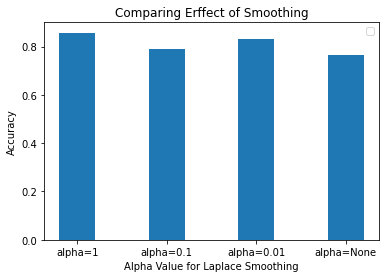

In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# Here 'alpha=None' is without smoothing
X = ['alpha=1','alpha=0.1','alpha=0.01', 'alpha=None']
accuracies = [high_probability_1, high_probability_01, high_probability_001, high_probability]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis,  accuracies, 0.4, label = None)
  
plt.xticks(X_axis, X)
plt.xlabel("Alpha Value for Laplace Smoothing")
plt.ylabel("Accuracy")
plt.title("Comparing Erffect of Smoothing")
plt.legend()
plt.show()


Calculating Final Accuracy - 

In [66]:
alpha = 1
dev_sentence = ford_dataset_dev_X.iloc[4545]
class_type, high_probability = laplace_smoothing(dev_sentence, alpha)
print("Type : "+ class_type)
print("Accuracy: " +str(high_probability))

Sentence: planning   scheduling of project execution  including attendance at builders design meetings 
Type : Responsibility
Accuracy: 0.796044576052746
